# Анализ данных по COVID-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# загрузка данных
data = pd.read_csv("covid_19_data.csv")
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
data.shape

(236017, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              236017 non-null  int64  
 1   ObservationDate  236017 non-null  object 
 2   Province/State   173972 non-null  object 
 3   Country/Region   236017 non-null  object 
 4   Last Update      236017 non-null  object 
 5   Confirmed        236017 non-null  float64
 6   Deaths           236017 non-null  float64
 7   Recovered        236017 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.4+ MB


In [6]:
# проверка названий индексов столбцов
data.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [3]:
# удаление ненужных столбцов по ключам, индексам
data_2 = data.drop(["SNo", "Last Update"], axis=1)
data_2.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [9]:
# проверка на дубликаты
data_2.duplicated(['ObservationDate', 'Province/State', 'Country/Region']).sum()

5

In [4]:
# удаление дубликатов
data_3 = data_2.drop_duplicates(['ObservationDate', 'Province/State', 'Country/Region'])

In [12]:
# повторная проверка на дубликаты
data_3.duplicated(['ObservationDate', 'Province/State', 'Country/Region']).sum()

0

In [21]:
# изучаем страны (стобец с индексом 'Country/Region')
countries = data_3['Country/Region'].str.strip(" (,)'").unique()

for c in np.sort(countries):
    print(c)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
Colombia
Comoros
Congo (Brazzaville
Congo (Kinshasa
Costa Rica
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Faroe Islands
Fiji
Finland
France
French Guiana
Gabon
Gambia
Gambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jersey
Jordan
Kazakhst

In [22]:
# смотрим Others
data_3.loc[data_3['Country/Region'] == "Others", :]

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
933,02/07/2020,Cruise Ship,Others,61.0,0.0,0.0
1005,02/08/2020,Cruise Ship,Others,61.0,0.0,0.0
1077,02/09/2020,Diamond Princess cruise ship,Others,64.0,0.0,0.0
1143,02/10/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1215,02/11/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1286,02/12/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1359,02/13/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1433,02/14/2020,Diamond Princess cruise ship,Others,218.0,0.0,0.0
1506,02/15/2020,Diamond Princess cruise ship,Others,285.0,0.0,0.0
1578,02/16/2020,Diamond Princess cruise ship,Others,355.0,0.0,0.0


In [23]:
# проверяем даты
data_3["ObservationDate"].head()

0    01/22/2020
1    01/22/2020
2    01/22/2020
3    01/22/2020
4    01/22/2020
Name: ObservationDate, dtype: object

In [5]:
# конвертация временных данных в спец тип данных класса TimeStamp
data_3["ObservationDate"] = pd.to_datetime(data_3["ObservationDate"])
# метод apply принимает объект функции, который нужно применить ко всем методам
data_3["ObservationDate"] = data_3["ObservationDate"].apply(lambda el: el.date())
data_3["ObservationDate"]

<ipython-input-5-33e06e515cd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3["ObservationDate"] = pd.to_datetime(data_3["ObservationDate"])
<ipython-input-5-33e06e515cd7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3["ObservationDate"] = data_3["ObservationDate"].apply(lambda el: el.date())


0         2020-01-22
1         2020-01-22
2         2020-01-22
3         2020-01-22
4         2020-01-22
             ...    
236012    2021-02-27
236013    2021-02-27
236014    2021-02-27
236015    2021-02-27
236016    2021-02-27
Name: ObservationDate, Length: 236012, dtype: object

In [6]:
# группировка данных по дате и вывод суммарных значений по всему миру
sum_data = data_3.groupby(["ObservationDate"]).sum()
sum_data

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,653.0,17.0,32.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-02-23,112109754.0,2485434.0,63295144.0
2021-02-24,112554301.0,2497488.0,63504603.0
2021-02-25,113001412.0,2507624.0,63732295.0


In [7]:
# Изучим названия стран из столбца 'Country/Region'
data_3['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [8]:
# очистка данных по названиям стран - удаление артефактов
data_3['Country/Region'] = data_3['Country/Region'].str.strip(" ")

# повторная проверка
data_3['Country/Region'].unique()

<ipython-input-8-e38a67f93a36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['Country/Region'] = data_3['Country/Region'].str.strip(" ")


array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', 'Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Czech Republic', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', '

In [9]:
# очистка данных по названиям стран - удаление артефактов
data_3['Country/Region'] = data_3['Country/Region'].str.strip("(,'')")

# повторная проверка
data_3['Country/Region'].unique()

<ipython-input-9-c6f96fe106ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['Country/Region'] = data_3['Country/Region'].str.strip("(,'')")


array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', 'Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Czech Republic', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', '

In [10]:
data_3.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [11]:
# суммарная статистика по странам и дате
df_country = data_3.groupby(['Country/Region', 'ObservationDate'])[['Confirmed', 'Deaths', 'Recovered']].sum()

In [12]:
df_country

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
                               2020-02-27             1.0     0.0        0.0
                               2020-02-28             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[69085 rows x 3 columns]

In [13]:
# данные по России
df_country.loc["Russia", :]

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,2.0,0.0,0.0
2020-02-01,2.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,2.0,0.0,0.0
2020-02-04,2.0,0.0,0.0
...,...,...,...
2021-02-23,4142126.0,82666.0,3697787.0
2021-02-24,4153735.0,83044.0,3709938.0
2021-02-25,4164802.0,83481.0,3725604.0


In [14]:
# данные максимумов по странам
df_country_max = df_country.groupby(['Country/Region']).max()
df_country_max.head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,55707.0,2443.0,49288.0
Albania,106215.0,1775.0,68969.0
Algeria,112960.0,2979.0,77976.0
Andorra,10849.0,110.0,10429.0
Angola,20782.0,506.0,19315.0
Antigua and Barbuda,726.0,14.0,291.0
Argentina,2104197.0,51946.0,1899087.0
Armenia,171793.0,3190.0,163309.0
Aruba,4.0,0.0,0.0


In [15]:
# изучаем интересующие нас страны
df_country_max.loc[['US', "Russia", 'Canada'], :]

,Confirmed,Deaths,Recovered
Country/Region,,,
US,28554465.0,511994.0,6399531.0
Russia,4187166.0,84330.0,3756808.0
Canada,869347.0,21961.0,816972.0


In [18]:
# сортировка данных по значениям определенного столбца
df_country_max.sort_values(by='Confirmed', ascending=False).head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,28554465.0,511994.0,6399531.0
India,11096731.0,157051.0,10775169.0
Brazil,10517232.0,254221.0,9371448.0
Russia,4187166.0,84330.0,3756808.0
UK,4182772.0,122939.0,11602.0
France,3747263.0,85741.0,261649.0
Spain,3188553.0,69142.0,150376.0
Italy,2907825.0,97507.0,2398352.0
Turkey,2693164.0,28503.0,2565723.0


## Визуализация

In [19]:
# данные по всему миру
sum_data

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,653.0,17.0,32.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-02-23,112109754.0,2485434.0,63295144.0
2021-02-24,112554301.0,2497488.0,63504603.0
2021-02-25,113001412.0,2507624.0,63732295.0


In [20]:
# создаем явные индексы
sum_data_2 = sum_data.reset_index()
sum_data_2

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,557.0,17.0,30.0
1,2020-01-23,653.0,17.0,32.0
2,2020-01-24,941.0,26.0,39.0
3,2020-01-25,1437.0,42.0,42.0
4,2020-01-26,2118.0,56.0,56.0
...,...,...,...,...
398,2021-02-23,112109754.0,2485434.0,63295144.0
399,2021-02-24,112554301.0,2497488.0,63504603.0
400,2021-02-25,113001412.0,2507624.0,63732295.0
401,2021-02-26,113415604.0,2517422.0,63992563.0


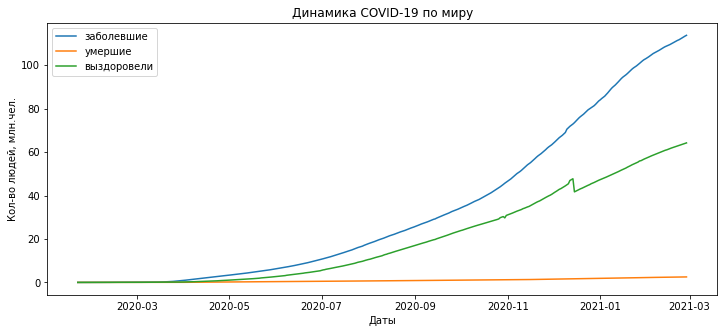

In [24]:
# график динамики развития пандемии по всему миру
plt.figure(figsize=[12, 5])
plt.plot(sum_data_2["ObservationDate"], sum_data_2["Confirmed"]/1000000, label="заболевшие")
plt.plot(sum_data_2["ObservationDate"], sum_data_2["Deaths"]/1000000, label="умершие")
plt.plot(sum_data_2["ObservationDate"], sum_data_2["Recovered"]/1000000, label="выздоровели")
plt.legend()
plt.title("Динамика COVID-19 по миру")
plt.xlabel("Даты")
plt.ylabel("Кол-во людей, млн.чел.")
plt.show()

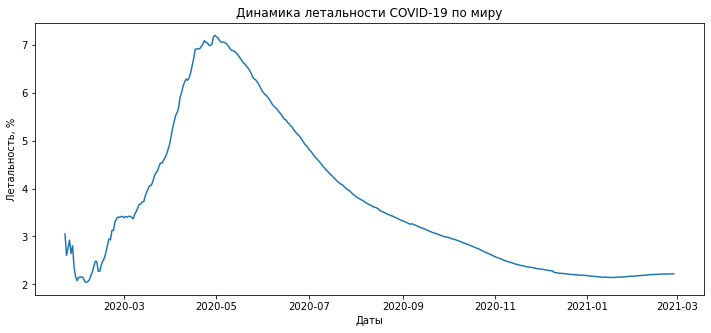

In [25]:
# грубая оценка летальности
plt.figure(figsize=[12, 5])
# расчет летальности
letal = (sum_data_2["Deaths"] / sum_data_2["Confirmed"]) * 100.0
plt.plot(sum_data_2["ObservationDate"], letal)

plt.title("Динамика летальности COVID-19 по миру")
plt.xlabel("Даты")
plt.ylabel("Летальность, %")
plt.show()